In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# Fetch daily data for the index from Yahoo Finance
Index = yf.Ticker('^KLSE').history (start='2018-01-01', end='2022-12-31',interval='1d')
#Index = yf.Ticker('^KLSE').history (period = 'max', interval='1mo')
Index

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02 00:00:00+08:00,1783.099976,1783.479980,1772.000000,1782.699951,82478600,0.0,0.0
2018-01-03 00:00:00+08:00,1785.790039,1795.869995,1785.209961,1792.790039,167780400,0.0,0.0
2018-01-04 00:00:00+08:00,1795.560059,1803.449951,1795.560059,1803.449951,161150500,0.0,0.0
2018-01-05 00:00:00+08:00,1804.790039,1817.969971,1803.810059,1817.969971,180760700,0.0,0.0
2018-01-08 00:00:00+08:00,1819.739990,1832.150024,1813.030029,1832.150024,176714600,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-23 00:00:00+08:00,1469.160034,1474.869995,1460.569946,1474.680054,48286800,0.0,0.0
2022-12-27 00:00:00+08:00,1474.390015,1477.430054,1468.150024,1474.689941,114386800,0.0,0.0
2022-12-28 00:00:00+08:00,1473.550049,1480.109985,1461.180054,1480.109985,134741200,0.0,0.0


In [3]:
# Calculate daily returns
Index['return'] = Index['Close'].pct_change()

In [4]:
# Calculate annual returns
returns = Index['return'].groupby(Index['return'].index.year).apply(lambda x: (1 + x).prod() - 1) * 100

In [5]:
# Calculate the average return
average_return = np.mean(returns)
print(average_return)  

-3.406698457416573


In [6]:
# Calculate the average return
median_return = np.median(returns)
print(median_return)  

-4.595767718390331


Visualisation

In [7]:
# Extract the return data and the dates
returns = Index['return'] * 100
dates = Index.index

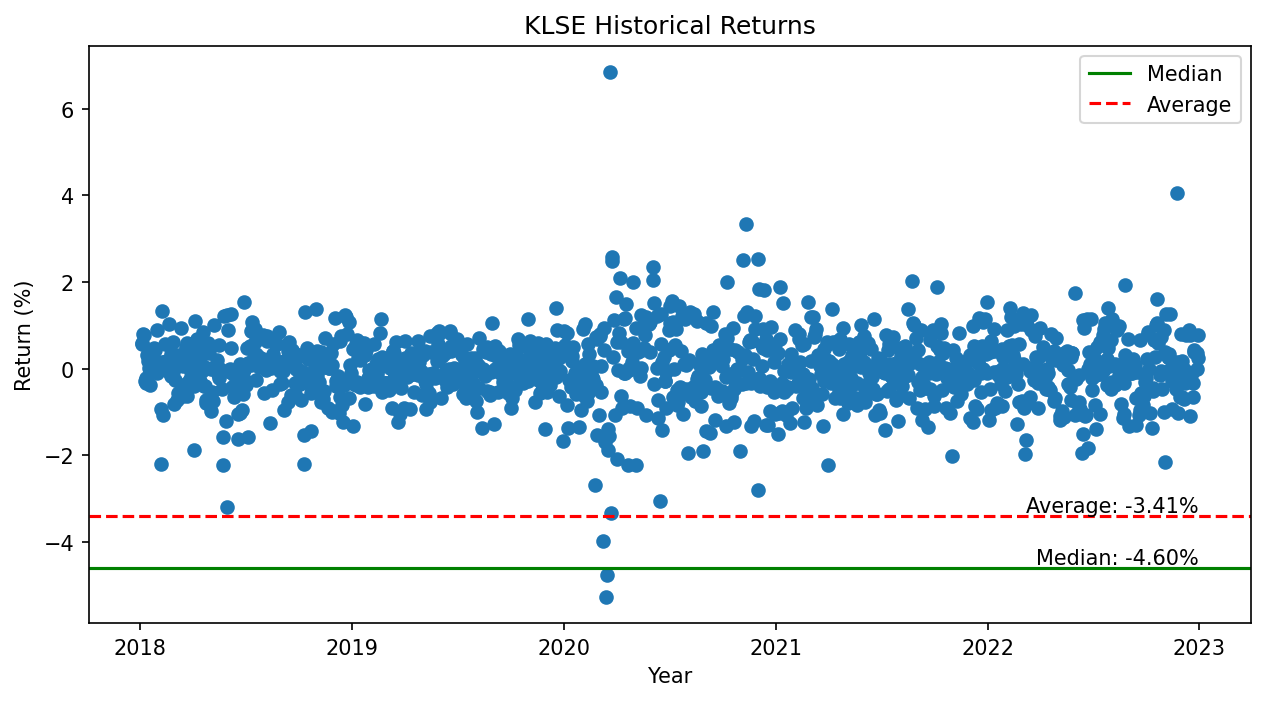

In [8]:
# Set the figure size (inches) and the resolution (dpi)
plt.figure(figsize=(10, 5), dpi=150)

# Add axis labels and a title
plt.xlabel('Year')
plt.ylabel('Return (%)')
plt.title('KLSE Historical Returns')

# Create a scatterplot of the returns data
plt.scatter(dates, returns)

# Draw a horizontal line 
plt.axhline(y=median_return, color='g', linestyle='-', label = 'Median')
plt.axhline(y=average_return, color='r', linestyle='--', label = 'Average')

# Add a text annotation to the plot showing the value of the average
plt.text(x=max(dates), y=median_return, s=f'Median: {median_return:.2f}%', horizontalalignment='right', verticalalignment='bottom')
plt.text(x=max(dates), y=average_return, s=f'Average: {average_return:.2f}%', horizontalalignment='right', verticalalignment='bottom')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()